<a href="https://colab.research.google.com/github/sathish-ekanayaka/Human-Activity-Recognition-Project/blob/main/Human_Activity_Recognition_Using_Wearable_Sensor_Data_and_Deep_Learning_Meethods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''Importing required libraries'''

import pandas as pd
import numpy as np
from scipy import signal as sig
import matplotlib.pyplot as plt
from math import pi
plt.rcParams['figure.figsize']=[100,20]
plt.rcParams.update({'font.size':10})
from google.colab import files
import os 
import glob
import tensorflow as tf

In [2]:
'''Connecting google drive'''
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [52]:
'''Preparing datasets as 50*9 pixel images'''

#L1=Standing
#L4=Walking
#L10=Jogging
#L11=Running

def activitydf(acceldata,label1,label4,label10,label11):
  acceldatawithcolumns=acceldata.set_axis(['chestAccX', 'chestAccY', 'chestAccZ', 'electro1', 'electro2','LancklAccX','LancklAccY','LancklAccZ','LancklGyX','LancklGyY','LancklGyZ','LancklMagX','LancklMagY','LancklMagZ','RLarmAccX','RLarmAccY','RLarmAccZ','RLarmGyX','RLarmGyY','RLarmGyZ','RLarmMagX','RLarmMagY','RLarmMagZ','ActivityLabel'], axis=1, inplace=False)
  selectedfeatures=acceldatawithcolumns[['chestAccX','chestAccY','chestAccZ','LancklAccX','LancklAccY','LancklAccZ','LancklGyX','LancklGyY','LancklGyZ','ActivityLabel']]
  selectedfeatures.drop(selectedfeatures.index[selectedfeatures['ActivityLabel'] == 0], inplace = True)

  Standing=selectedfeatures.loc[selectedfeatures['ActivityLabel'] ==label1 ].reset_index()
  Standing.drop(['index'], axis=1,inplace=True)
  rows1=Standing.shape[0]
  rows1=rows1-rows1%50
  Standing=Standing.iloc[0:rows1,:]
  Standing=Standing.drop(['ActivityLabel'], axis=1)
  Standingdata=Standing.to_numpy()
  StandingdataX=np.reshape(Standingdata,(-1,50,9))
  StandingdataY = np.array(['Standing' for _ in range(StandingdataX.shape[0])])

  Walking=selectedfeatures.loc[selectedfeatures['ActivityLabel'] ==label4 ].reset_index()
  Walking.drop(['index'], axis=1,inplace=True)
  rows4=Walking.shape[0]
  rows4=rows4-rows4%50
  Walking=Walking.iloc[0:rows4,:]
  Walking=Walking.drop(['ActivityLabel'], axis=1)
  Walkingdata=Walking.to_numpy()
  WalkingdataX=np.reshape(Walkingdata,(-1,50,9))
  WalkingdataY = np.array(['Walking' for _ in range(WalkingdataX.shape[0])])


  Jogging=selectedfeatures.loc[selectedfeatures['ActivityLabel'] ==label10 ].reset_index()
  Jogging.drop(['index'], axis=1,inplace=True)
  rows10=Jogging.shape[0]
  rows10=rows10-rows10%50
  Jogging=Jogging.iloc[0:rows10,:]
  Jogging=Jogging.drop(['ActivityLabel'], axis=1)
  Joggingdata=Jogging.to_numpy()
  JoggingdataX=np.reshape(Joggingdata,(-1,50,9))
  JoggingdataY = np.array(['Jogging' for _ in range(JoggingdataX.shape[0])])



  Running=selectedfeatures.loc[selectedfeatures['ActivityLabel'] ==label11 ].reset_index()
  Running.drop(['index'], axis=1,inplace=True)
  rows11=Running.shape[0]
  rows11=rows11-rows11%50
  Running=Running.iloc[0:rows11,:]
  Running=Running.drop(['ActivityLabel'], axis=1)
  Runningdata=Running.to_numpy()
  RunningdataX=np.reshape(Runningdata,(-1,50,9))
  RunningdataY = np.array(['Running' for _ in range(RunningdataX.shape[0])])

  
  return StandingdataX,WalkingdataX,JoggingdataX,RunningdataX,StandingdataY,WalkingdataY,JoggingdataY,RunningdataY




time: 89.7 ms (started: 2021-02-12 05:29:31 +00:00)


In [4]:
''' importing min max scaler for feature scale data'''
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()

In [5]:
'''Before feeding into the neural network, we need to prepare our data according to a suitable shape, So here we have initialized numpy arrays with
zeros for later convert them to training and testing data by assigning right values'''

def arrayinit(a,b,c):
  arr1x=np.zeros((0,50,9))
  arr2x=np.zeros((0,50,9))
  arr3x=np.zeros((0,50,9))
  arr4x=np.zeros((0,50,9))
  arr1y=np.zeros((0))
  arr2y=np.zeros((0))
  arr3y=np.zeros((0))
  arr4y=np.zeros((0))
  return arr1x,arr2x,arr3x,arr4x,arr1y,arr2y,arr3y,arr4y

In [6]:


Sx,Wx,Jx,Rx,Sy,Wy,Jy,Ry=arrayinit(0,50,9)
os.chdir(r'/content/drive/MyDrive/Final Year Project/MHEALTHDATASET')
filelist=glob.glob('*.csv')
for file in filelist:
  df = pd.read_csv(file)
  StandingdataX,WalkingdataX,JoggingdataX,RunningdataX,StandingdataY,WalkingdataY,JoggingdataY,RunningdataY=activitydf(df,1,4,10,11)
  
  Sx= np.concatenate((Sx, StandingdataX), axis=0)
  Sx=tf.keras.utils.normalize(Sx,axis=2)
  Wx= np.concatenate((Wx, WalkingdataX), axis=0)
  Wx=tf.keras.utils.normalize(Wx,axis=2)
  Jx= np.concatenate((Jx, JoggingdataX), axis=0)
  Jx=tf.keras.utils.normalize(Jx,axis=2)
  Rx= np.concatenate((Rx, RunningdataX), axis=0)
  Rx=tf.keras.utils.normalize(Rx,axis=2)
  Sy= np.concatenate((Sy, StandingdataY), axis=0)
  Wy= np.concatenate((Wy, WalkingdataY), axis=0)
  Jy= np.concatenate((Jy, JoggingdataY), axis=0)
  Ry= np.concatenate((Ry, RunningdataY), axis=0)
  
  



/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.p

In [7]:
df

,-9.6997,-0.87525,-0.96298,-0.029304,-0.07954,0.28409,-9.5692,1.4931,0.70501,-0.48968,0.058939,0.19372,0.36504,-0.44043,-0.9863,-8.7188,4.1161,0.6451,-0.45175,0.69181,0.71991,0.17803,0.37363,0
0,-9.4890,-0.801030,-1.10370,-0.062794,-0.092098,0.41798,-9.6980,1.48800,0.70501,-0.48968,0.058939,0.37005,0.546760,-0.30147,-0.98795,-9.0372,4.27730,0.666670,-0.44353,0.66810,0.54040,0.17978,0.37002,0
1,-9.5541,-1.083100,-1.24480,-0.075353,-0.117220,0.33479,-9.5896,1.44050,0.69388,-0.48593,0.078585,0.37005,0.546760,-0.30147,-0.89327,-8.7099,4.01240,0.666670,-0.44353,0.66810,0.72539,0.72599,0.72927,0
2,-9.3680,-0.791410,-0.93438,-0.092098,-0.129770,0.27516,-9.6480,1.54120,0.69388,-0.48593,0.078585,0.37877,0.730160,-0.59208,-0.95632,-8.7986,4.14340,0.666670,-0.44353,0.66810,0.54392,0.53186,-0.71646,0
3,-9.6678,-0.953350,-1.20160,-0.092098,-0.129770,0.32434,-9.6298,1.37590,0.69388,-0.48593,0.078585,0.37005,0.546760,-0.30147,-0.95808,-8.5089,4.10580,0.668630,-0.45175,0.69181,0.54210,0.35041,-0.71468,0
4,-9.4274,-0.851920,-1.00300,-0.092098,-0.133960,0.43008,-9.7661,1.60970,0.70501,-0.47842,0.055010,0.18939,0.365080,-0.29604,-1.19700,-8.6289,4.11020,0.668630,-0.45175,0.69181,0.72176,0.36309,0.73283,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98298,-9.2476,-0.248070,-2.62230,0.230250,0.234430,1.78490,-9.8287,0.29725,-0.34137,-0.90056,-0.614930,-0.68764,0.557340,-1.14620,-3.71980,-8.9071,0.29423,0.041176,-0.99384,-0.48060,2.40890,7.49610,7.91550,0
98299,-9.4632,-0.073513,-2.11190,0.276300,0.284670,1.86870,-9.8766,0.46236,-0.34137,-0.90056,-0.614930,-0.86819,0.742630,-1.14450,-3.71600,-8.7455,0.44814,0.041176,-0.99384,-0.48060,1.69450,7.86600,7.89750,0
98300,-9.4011,-0.144580,-3.02350,0.288850,0.301410,1.69280,-9.9290,0.16631,-0.34137,-0.90056,-0.614930,-0.86841,0.008684,-1.13710,-3.88240,-9.1155,0.45048,0.041176,-0.99384,-0.48060,1.15770,8.05280,7.88490,0
98301,-9.3732,-0.026252,-2.70760,0.351650,0.347460,1.52790,-9.6306,0.30458,-0.34137,-0.90056,-0.614930,-0.33979,-0.730550,-0.70740,-3.55640,-9.1441,0.59488,0.041176,-0.99384,-0.48060,0.27441,9.48790,5.32580,0


In [8]:
'''Preparing labels'''


Syn= np.full((610, 1), 0)
Wyn= np.full((610, 1), 1)
Jyn= np.full((610, 1), 2)
Ryn= np.full((610, 1), 3)


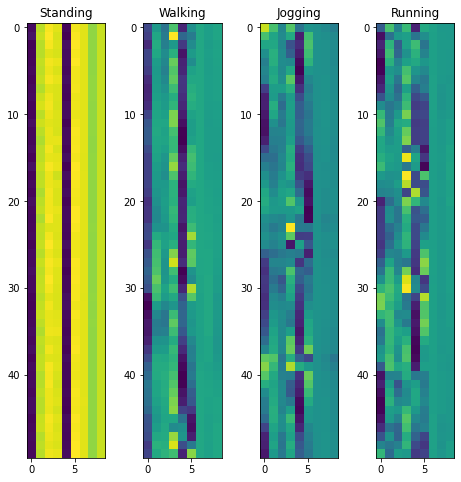

In [9]:
'''Plotting image samples from each category to get an intuition'''

images=[Sx[100],Wx[300],Jx[300],Rx[300]]
titles=['Standing','Walking','Jogging','Running']

w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 1
for i,title,image in zip(range(1, columns*rows +1),titles,images):
    img = image
    fig.add_subplot(rows, columns, i)
    plt.title(title)
    plt.imshow(img)
plt.show()


In [10]:
Sx[1].shape

(50, 9)

In [11]:
import numpy as np
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,BatchNormalization,Flatten,Conv2D,MaxPool2D,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import sparse_categorical_accuracy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import os 
import glob
import shutil
import random
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)
%matplotlib inline

In [12]:
'''Creating the convolutional neural network model'''
model=Sequential([
                  Conv2D(filters=64,kernel_size=(2,5),activation='relu',padding='same',input_shape=(50,9,1)),
                  MaxPool2D(pool_size=(2,2),strides=2),
                  Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'),
                  Dropout(0.2),
                  MaxPool2D(pool_size=(3,3),strides=(1,1)),
                  Conv2D(filters=128,kernel_size=(2,2),activation='relu',padding='same'),
                  Flatten(),
                  Dense(units=128,activation='relu'),
                  Dropout(0.2),
                  Dense(units=4,activation='softmax')

     ])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 9, 64)         704       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 4, 64)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 4, 128)        73856     
_________________________________________________________________
dropout (Dropout)            (None, 25, 4, 128)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 2, 128)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 2, 128)        65664     
_________________________________________________________________
flatten (Flatten)            (None, 5888)              0

In [14]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics='accuracy')

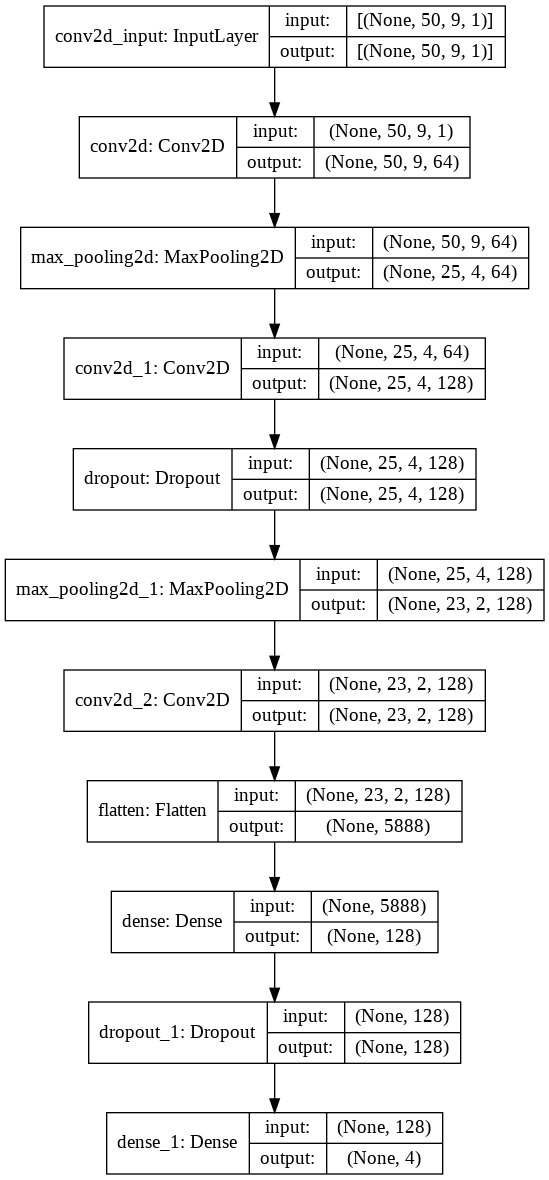

In [15]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [53]:
'''Creating data sets for feed into the model'''

Sensor_data=np.concatenate((Sx,Wx,Jx,Rx),axis=0)
#Sensor_data=Sensor_data.reshape(-1,50,9,1)
Label_data=np.concatenate((Syn,Wyn,Jyn,Ryn),axis=0)
#Label_data=Label_data.reshape(-1,1)

time: 20.6 ms (started: 2021-02-12 05:51:00 +00:00)


In [54]:
Sensor_data.shape

(2440, 50, 9)

time: 4.82 ms (started: 2021-02-12 05:51:01 +00:00)


In [55]:
'''creting training and testing sets'''
x_train,x_test,y_train,y_test=train_test_split(Sensor_data,Label_data,test_size=0.5)

time: 20.4 ms (started: 2021-02-12 05:51:03 +00:00)


In [56]:
'''Shaping training and testing data as they can be fitted into the model'''
x_train=x_train.reshape(-1,50,9,1)
x_test=x_test.reshape(-1,50,9,1)
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
#Sensor_d=Sensor_data.reshape(-1,50,9,1)
#Label_d=Label_data.reshape(-1,1)

time: 3.41 ms (started: 2021-02-12 05:51:04 +00:00)


In [57]:
x_train.shape

(1220, 50, 9, 1)

time: 3.57 ms (started: 2021-02-12 05:51:07 +00:00)


In [58]:
#Label_data = Label_data.ravel()

time: 865 µs (started: 2021-02-12 05:51:08 +00:00)


In [59]:
x_test.shape

(1220, 50, 9, 1)

time: 3.55 ms (started: 2021-02-12 05:51:09 +00:00)


In [60]:
!pip install ipython-autotime

%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.66 s (started: 2021-02-12 05:51:11 +00:00)


In [ ]:
'''Training the model'''


model.fit(x=x_test,y=y_test,validation_split=0.2,batch_size=100,epochs=99,verbose=2)

In [24]:
import os.path
if os.path.isfile('/content/drive/MyDrive/Final Year Project/Deep L Models/CNN_model_2.h5') is False:
  model.save('/content/drive/MyDrive/Final Year Project/Deep L Models/CNN_model_2.h5')

time: 220 ms (started: 2021-02-12 05:27:41 +00:00)


In [25]:
'''After the model is trained we test the model using test set'''
activity_predictions=model.predict(x_test)

time: 796 ms (started: 2021-02-12 05:27:42 +00:00)


In [26]:

rounded_predictions=np.argmax(activity_predictions,axis=-1)

time: 1.66 ms (started: 2021-02-12 05:27:43 +00:00)


In [27]:
rounded_predictions

array([3, 0, 0, ..., 1, 3, 3])

time: 4.01 ms (started: 2021-02-12 05:27:43 +00:00)


In [28]:
def plot_confusion_matrix(path,cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(path)


time: 22 ms (started: 2021-02-12 05:27:43 +00:00)


In [29]:
cm_plot_labels = ['Standing','Walking','Jogging','Running']

time: 1.21 ms (started: 2021-02-12 05:27:43 +00:00)


In [30]:
cm= confusion_matrix(y_true=y_test,y_pred=rounded_predictions)

time: 5.75 ms (started: 2021-02-12 05:27:43 +00:00)


Confusion matrix, without normalization
[[305   0   0   0]
 [  0 296   0   0]
 [  0   0 313   1]
 [  0   0   0 305]]


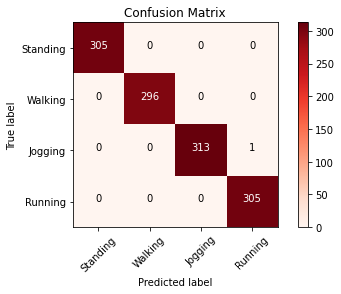

time: 371 ms (started: 2021-02-12 05:27:43 +00:00)


In [31]:
plot_confusion_matrix('/content/drive/MyDrive/Final Year Project/Deep L Models/confusion matrices/confusion_cnn_2',cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [32]:
'''This is the function for calculate what the athlete has done in each and every second through out the session, This is one of the functions
we are going to implement in our web app'''
'''Here we need to give the paths correctly as we hope to store the relevent csv files in our local computer or server we need to load the sasved model 
from its particular location as well'''


def Workload_calculation(path):
  Trialdf=pd.read_csv(path)
  Trialdf=Trialdf.set_axis(['chestAccX', 'chestAccY', 'chestAccZ', 'electro1', 'electro2','LancklAccX','LancklAccY','LancklAccZ','LancklGyX','LancklGyY','LancklGyZ','LancklMagX','LancklMagY','LancklMagZ','RLarmAccX','RLarmAccY','RLarmAccZ','RLarmGyX','RLarmGyY','RLarmGyZ','RLarmMagX','RLarmMagY','RLarmMagZ','ActivityLabel'], axis=1, inplace=False)
  Trialdf=Trialdf[['chestAccX','chestAccY','chestAccZ','LancklAccX','LancklAccY','LancklAccZ','LancklGyX','LancklGyY','LancklGyZ','ActivityLabel']]
  Trialdf.drop(Trialdf.index[Trialdf['ActivityLabel'] == 0], inplace = True)
  neededrows=Trialdf.shape[0]
  neededrows=neededrows-neededrows%50
  Trialdf=Trialdf.iloc[:neededrows]
  Trialdf=Trialdf.drop(['ActivityLabel'], axis=1)
  Trialdf=Trialdf.to_numpy()
  Trialdf=np.reshape(Trialdf,(-1,50,9,1))
  Raw_workload=np.argmax(model.predict(Trialdf),axis=1)
  return Raw_workload



time: 16.4 ms (started: 2021-02-12 05:27:43 +00:00)


In [33]:

workload=Workload_calculation("/content/drive/MyDrive/Final Year Project/MHEALTHDATASET/Subject4.csv")

time: 876 ms (started: 2021-02-12 05:27:43 +00:00)


In [34]:
workload

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,

time: 6.86 ms (started: 2021-02-12 05:27:44 +00:00)


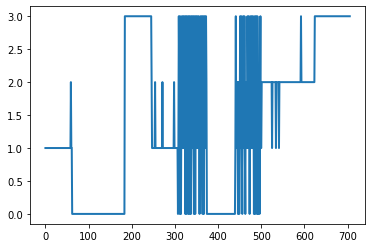

time: 191 ms (started: 2021-02-12 05:27:44 +00:00)


In [35]:
plt.plot(workload,linewidth=2)

In [36]:
''' This is the other function we need to implement in our web application'''
'''In this function the 'workload calculation function will be called and then the number of sprints, normal workload segments and rests during a particular
are calculated'''
'''This is the function which should be directly connected with a button'''


def calcworklod(path):
  workload=Workload_calculation(path)
  rests=0
  moderates=0
  sprints=0
  j=0
  k=0
  l=0
  for i in workload:
    if i==0 or i==1:
      if l>5:
        sprints=sprints+1
      l=0
      if k>3:
        moderates=moderates+1
      k=0 
      j=j+1
    elif i==2:
      if j>40:
        rests=rests+1
      j=0
      if l>5:
        sprints=sprints+1
      l=0
      k=k+1
    else:
      if j>40:
        rests=rests+1
      j=0
      if k>3:
        moderates=moderates+1
      k=0
    l=l+1
  return rests,moderates,sprints

    
    


time: 18.3 ms (started: 2021-02-12 05:27:44 +00:00)


In [37]:
workload

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,

time: 4.97 ms (started: 2021-02-12 05:27:44 +00:00)


In [38]:
rests,moderates,sprints=calcworklod("/content/drive/MyDrive/Final Year Project/MHEALTHDATASET/Subject4.csv")

time: 876 ms (started: 2021-02-12 05:27:44 +00:00)


In [39]:
rests

3

time: 3.12 ms (started: 2021-02-12 05:27:45 +00:00)


In [40]:
moderates

5

time: 3.05 ms (started: 2021-02-12 05:27:45 +00:00)


In [41]:
sprints

1

time: 2.76 ms (started: 2021-02-12 05:27:45 +00:00)


***Using LSTM models***

In [42]:
import numpy as np
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,BatchNormalization,Flatten,Conv2D,MaxPool2D,Dropout,BatchNormalization,LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import sparse_categorical_accuracy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import os 
import glob
import shutil
import random
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)
%matplotlib inline

time: 19.6 ms (started: 2021-02-12 05:27:45 +00:00)


In [43]:
lstmmodel=Sequential([
                      LSTM(units=32,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],x_train.shape[2])),
                      LSTM(units=32,activation='relu',return_sequences=True),
                      LSTM(units=64),
                      Dense(units=4,activation='softmax')
                      
])

time: 446 ms (started: 2021-02-12 05:27:45 +00:00)


In [44]:
lstmmodel.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics='accuracy')

time: 15.2 ms (started: 2021-02-12 05:27:46 +00:00)


In [ ]:
x_train_new=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],x_train.shape[2]))
x_test_new=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],x_test.shape[2]))



%load_ext autotime

lstmmodel.fit(x=x_train_new,y=y_train,validation_split=0.2,batch_size=100,epochs=99,verbose=2)

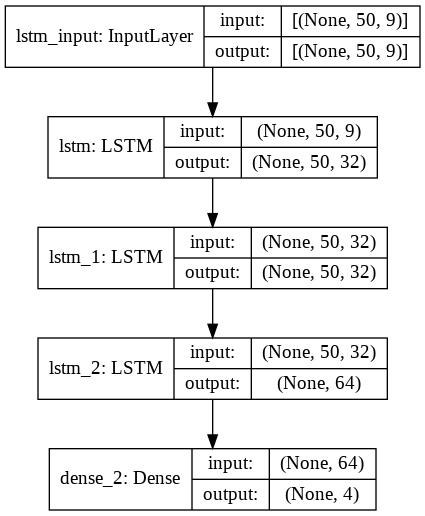

time: 325 ms (started: 2021-02-12 05:29:29 +00:00)


In [46]:
plot_model(lstmmodel, to_file='lstm_model_plot.png', show_shapes=True, show_layer_names=True)

In [47]:
lstm_predictions=lstmmodel.predict(x_test_new)
lstm_predictions=np.argmax(lstm_predictions,axis=-1)

time: 1.13 s (started: 2021-02-12 05:29:30 +00:00)


In [48]:
if os.path.isfile('/content/drive/MyDrive/Final Year Project/Deep L Models/LSTM_model.h5') is False:
  model.save('/content/drive/MyDrive/Final Year Project/Deep L Models/LSTM_model.h5')

time: 2.17 ms (started: 2021-02-12 05:29:31 +00:00)


In [49]:
lstm_cm_plot_labels = ['Standing','Walking','Jogging','Running']

time: 1.27 ms (started: 2021-02-12 05:29:31 +00:00)


In [50]:
lstm_cm= confusion_matrix(y_true=y_test,y_pred=lstm_predictions)

time: 4.47 ms (started: 2021-02-12 05:29:31 +00:00)


Confusion matrix, without normalization
[[305   0   0   0]
 [  0 296   0   0]
 [  0   0 307   7]
 [  0   0  17 288]]


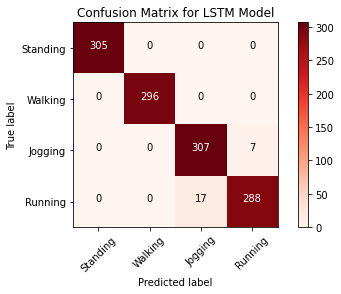

time: 359 ms (started: 2021-02-12 05:29:31 +00:00)


In [51]:
plot_confusion_matrix('/content/drive/MyDrive/Final Year Project/Deep L Models/confusion matrices/confusion_lstm_2',cm=lstm_cm, classes=lstm_cm_plot_labels, title='Confusion Matrix for LSTM Model')